In [41]:
import torch

import torch.nn as nn 

import torch.optim as optim

import torch.nn.functional as F

import matplotlib.pyplot as plt

Train a simple neural network using different initialization methods and compare their performance.

Step 2: Define a Simple Neural Network

In [42]:
class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__()

        self.fc1 = nn.Linear(2,4)

        self.fc2 = nn.Linear(4,1)

    def forward(self,x):

        x = F.relu(self.fc1(x))  # ReLU activation

        x = torch.sigmoid(self.fc2(x)) # Sigmoid activation for output

        return x

Step 3: Define Initialization Methods

In [43]:
def zero_init(m):

    if isinstance(m, nn.Linear):

        nn.init.constant_(m.weight, 0)

        nn.init.constant_(m.bias, 0)

def random_init(m):

    if isinstance(m, nn.Linear):

        nn.init.uniform_(m.weight, -0.1, 0.1)

        nn.init.constant_(m.bias, 0)

def xavier_init(m):

    if isinstance(m, nn.Linear):

        nn.init.xavier_uniform_(m.weight)

        nn.init.constant_(m.bias, 0)

def he_init(m):

    if isinstance(m, nn.Linear):

        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')

        nn.init.constant_(m.bias, 0)

Step 4: Prepare XOR Dataset

In [44]:
X = torch.tensor([[0.0, 0.0],[0.0,1.0],[1.0, 0.0],[1.0,1.0]], dtype=torch.float32)

y = torch.tensor([[0.0],[1.0],[1.0],[0.0]], dtype=torch.float32)

Step 5: Training Function

In [45]:
def train_model(init_function, epochs=1000, lr=0.1):

    model = SimpleNN()

    model.apply(init_function) # Apply initialization

    criterion = nn.BCELoss() # Binary Cross-Entropy Loss for classification

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    
    
    losses = []

    for epoch in range(epochs):

        optimizer.zero_grad()

        predictions = model(X)

        loss = criterion(predictions, y)

        loss.backward()

        optimizer.step()

        losses.append(loss.item())

        if epoch % 200 == 0:

            print(f'Epoch: {epoch}, Loss : {loss.item()}')

    return losses

Step 6: Train and Compare Different Initializations

In [46]:
epochs = 1000

loss_zero = train_model(zero_init, epochs)

loss_random = train_model(random_init, epochs)

loss_xavier = train_model(xavier_init, epochs)

loss_he = train_model(he_init, epochs)

Epoch: 0, Loss : 0.6931471824645996
Epoch: 200, Loss : 0.6931471824645996
Epoch: 400, Loss : 0.6931471824645996
Epoch: 600, Loss : 0.6931471824645996
Epoch: 800, Loss : 0.6931471824645996
Epoch: 0, Loss : 0.6931471824645996
Epoch: 200, Loss : 0.6911221742630005
Epoch: 400, Loss : 0.6631100177764893
Epoch: 600, Loss : 0.5441136360168457
Epoch: 800, Loss : 0.44324007630348206
Epoch: 0, Loss : 0.6681622266769409
Epoch: 200, Loss : 0.4140234589576721
Epoch: 400, Loss : 0.20218908786773682
Epoch: 600, Loss : 0.09636092931032181
Epoch: 800, Loss : 0.05354584380984306
Epoch: 0, Loss : 0.791912317276001
Epoch: 200, Loss : 0.5602318644523621
Epoch: 400, Loss : 0.48646920919418335
Epoch: 600, Loss : 0.3577485680580139
Epoch: 800, Loss : 0.09603534638881683


Step 7: Plot the Loss Curves

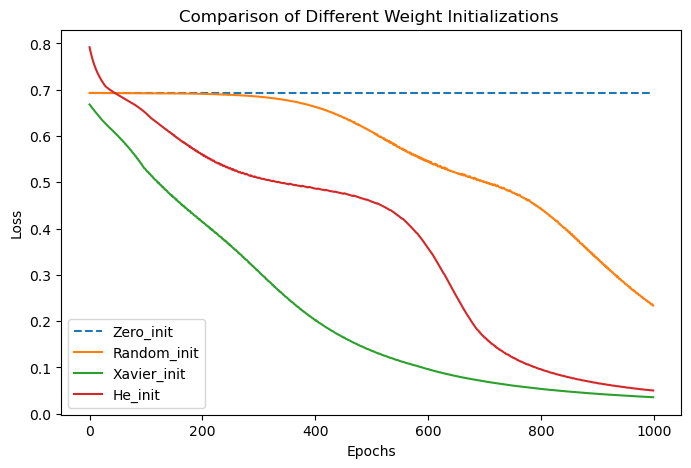

In [47]:
plt.figure(figsize=(8,5))

plt.plot(loss_zero, label='Zero_init', linestyle = 'dashed')

plt.plot(loss_random, label='Random_init')

plt.plot(loss_xavier, label='Xavier_init')

plt.plot(loss_he, label='He_init')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.title('Comparison of Different Weight Initializations ')

plt.show()